<a href="https://colab.research.google.com/github/AlexanderAvocone/Project/blob/master/Logistische_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praxisaufgabe zur linearen Regression**
Ziel der Übung ist es anhand einer praktischen Aufgabe sich mit der logistischen Regression zu beschäftigen.
Aufgabe: Vorhersagemodell für Ad-Clicks anhand der Nutzereigenschaften.

##**Datenanalyse**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

ad_data = pd.read_csv("Advertising.csv")

###Erster Eindruck


In [ ]:
ad_data.head()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


Keine fehlenden Daten vorhanden. Als Nächstes untersuchen wir die Relevanz des Landes. Hierzu lassen wir uns ausgeben, wie viele Länder es eigentlich in der Liste hat und wie oft sie auftauchen. 


In [ ]:
print("\nNumber of countries:",len(ad_data["Country"].unique()))
countries = ad_data.groupby("Country")
how_often = countries["Age"].count()
print(how_often)
print("Maximum:", how_often.max())


Number of countries: 237
Country
Afghanistan          8
Albania              7
Algeria              6
American Samoa       5
Andorra              2
                    ..
Wallis and Futuna    4
Western Sahara       7
Yemen                3
Zambia               4
Zimbabwe             6
Name: Age, Length: 237, dtype: int64
Maximum: 9


9 von 1000 Werten sind deutlich zu wenig um ein verlässliches Modell zu generieren. Somit fällt auch die "City"-Spalte weg.

##**Visualisierung**

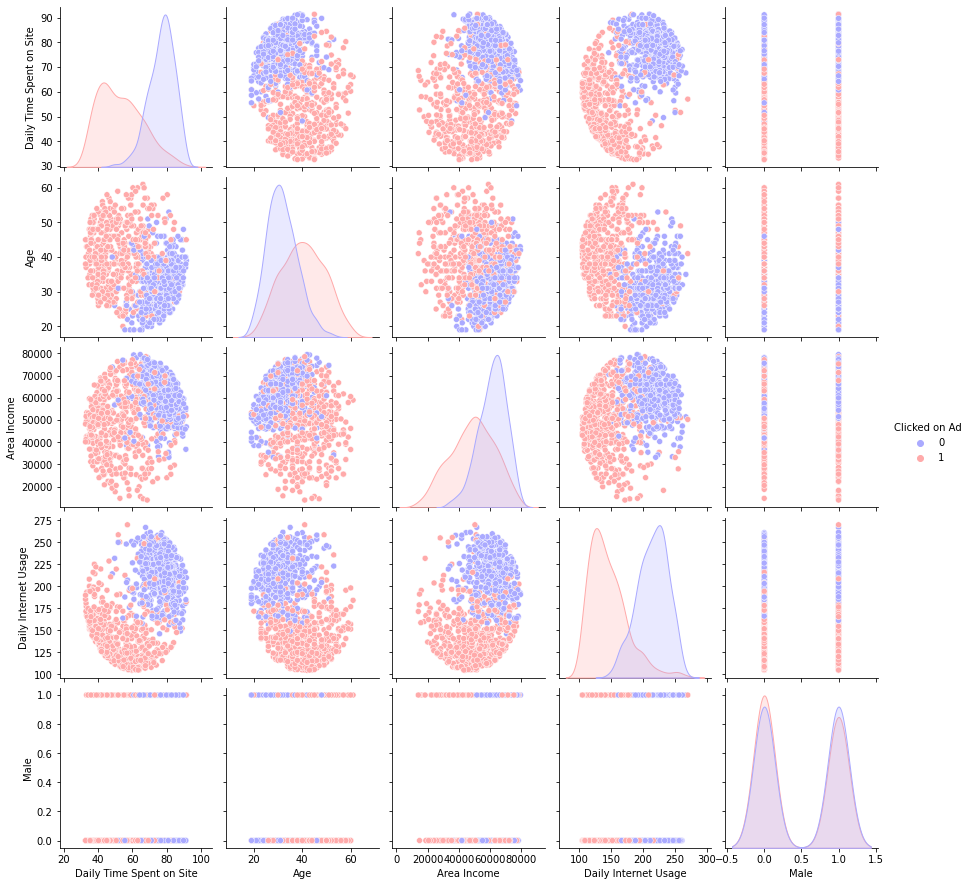

In [ ]:
sns.pairplot(ad_data, hue = "Clicked on Ad", palette= "bwr")

Bla bla, alle parameter bilden irgendwelche diagramme, die eine seperation andeuten. --> logistische regression

##**Test und Train**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

ad_data.columns
X = ad_data.drop(["Ad Topic Line","City","Country","Timestamp","Clicked on Ad"], axis=1)
y = ad_data["Clicked on Ad"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state = 101, stratify = y)

logreg = LogisticRegression(penalty="l1", solver ="liblinear")
logreg.fit(X_train, y_train)
prediction = logreg.predict(X_test)
print(classification_report(y_test, prediction))


              precision    recall  f1-score   support

           0       0.96      0.96      0.96       165
           1       0.96      0.96      0.96       165

    accuracy                           0.96       330
   macro avg       0.96      0.96      0.96       330
weighted avg       0.96      0.96      0.96       330



Um zu verhindern, dass Modelle overfittet werden, verwendet man verschiedene regularization functions/penalties. In unserem Fall ergibt die Kombination aus **l1** (Lasso regression) und **liblinear** die höchste **accuracy**.


$F_1 = \frac{n}{\frac{1}{recall}+\frac{1}{precision}}$

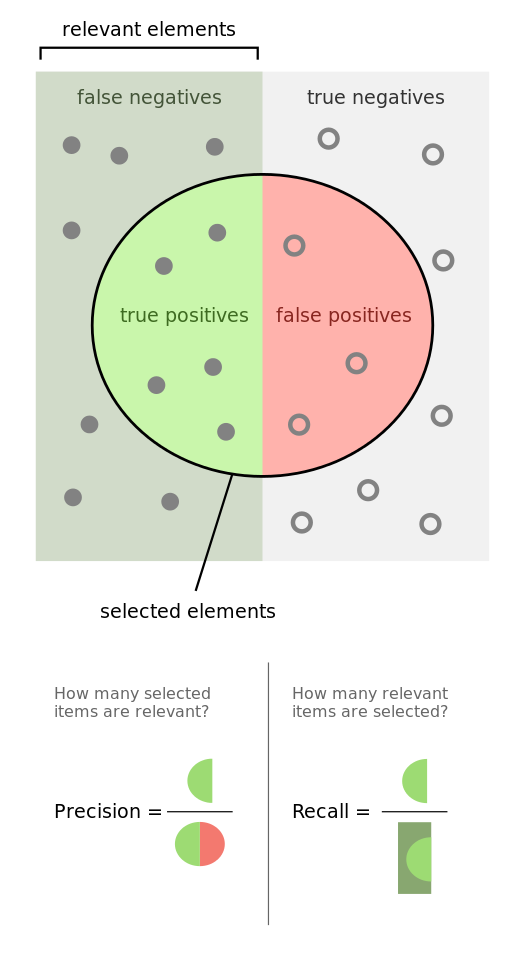